In [1]:
import json
import pandas as pd
import numpy as np

In [61]:
path = "./PPMI_ClinicalData/"

# Abeta 1-42

In [3]:
pd_abeta42 = pd.read_csv(path+"Current_Biospecimen_Analysis_Results.csv")
pd_abeta42 = pd_abeta42[pd_abeta42['TESTNAME'] == 'ABeta 1-42'].reset_index(drop=True)
print(len(pd_abeta42))
pd_abeta42.head()

3070


/home/shreeya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,ABeta 1-42,1359,pg/mL,2017-08-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,ABeta 1-42,611,pg/mL,2017-09-13,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,ABeta 1-42,989.1,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,ABeta 1-42,366.2,pg/mL,2017-09-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
4,41523,Female,Genetic Cohort,BL,Cerebrospinal Fluid,ABeta 1-42,1428,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [5]:
patno_abeta42 = []
for i in range(len(pd_abeta42)):
    if(pd_abeta42["PATNO"][i] not in patno_abeta42):
        patno_abeta42.append(pd_abeta42["PATNO"][i])

print("Number of Patients:", len(patno_abeta42))

Number of Patients: 921


In [10]:
print(list(pd_abeta42.columns))
print(list(pd_abeta42.columns)[6])

['PATNO', 'GENDER', 'DIAGNOSIS', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'update_stamp']
TESTVALUE


In [27]:
pd_abeta42[pd_abeta42["TESTVALUE"] == "<200"]

,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
143,3660,Female,PD,V08,Cerebrospinal Fluid,ABeta 1-42,<200,pg/mL,2017-08-09,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
1599,3053,Male,Control,V02,Cerebrospinal Fluid,ABeta 1-42,<200,pg/mL,2017-06-29,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [35]:
lentot = len(patno_abeta42)
len1 = len(pd_abeta42)
columns = list(pd_abeta42.columns)

abeta42 = pd.DataFrame(columns = ["PATNO", "ABETA42"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_abeta42[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_abeta42["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==6):
                val = pd_abeta42[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                elif(val == "<200"):
                    # Skipping this data entry
                    count1 -= 1
                    continue
                else:
                    val = float(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["ABETA42"] = score
    
    abeta42 = abeta42.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900


In [30]:
print(len(abeta42))
abeta42.head()

921


,PATNO,ABETA42
0,3915.0,1119.375000
1,3914.0,614.150000
2,3838.0,746.900000
3,60073.0,366.733333
4,41523.0,1428.000000


In [40]:
abeta42.to_csv("abeta42.csv")

# t-tau

In [42]:
pd_ttau = pd.read_csv(path+"Current_Biospecimen_Analysis_Results.csv")
pd_ttau = pd_ttau[pd_ttau['TESTNAME'] == 'tTau'].reset_index(drop=True)
print(len(pd_ttau))
pd_ttau.head()

3070


/home/shreeya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,tTau,162.4,pg/mL,2017-08-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,tTau,180.9,pg/mL,2017-09-13,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,tTau,156,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,tTau,229,pg/mL,2017-09-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
4,41523,Female,Genetic Cohort,BL,Cerebrospinal Fluid,tTau,153.9,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [43]:
patno_ttau = []
for i in range(len(pd_ttau)):
    if(pd_ttau["PATNO"][i] not in patno_ttau):
        patno_ttau.append(pd_ttau["PATNO"][i])

print("Number of Patients:", len(patno_ttau))

Number of Patients: 921


In [45]:
print(list(pd_ttau.columns))
print(list(pd_ttau.columns)[6])

['PATNO', 'GENDER', 'DIAGNOSIS', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'update_stamp']
TESTVALUE


In [57]:
len(pd_ttau[pd_ttau["TESTVALUE"] == "<80"])
pd_ttau[pd_ttau["TESTVALUE"] == "<80"]

,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
67,60118,Male,Prodromal,BL,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-08-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
190,3122,Male,PD,V08,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-17,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
191,40451,Male,Genetic Cohort,V04,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-08-14,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
245,60170,Male,Prodromal,V04,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-08-11,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
290,4035,Male,PD,V06,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-14,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
336,13039,Male,Prodromal,V02,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-24,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
358,3279,Male,PD,V08,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-26,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
530,3122,Male,PD,V06,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-17,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
687,3269,Female,PD,V08,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-24,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
691,3369,Male,Control,V08,Cerebrospinal Fluid,tTau,<80,pg/mL,2017-07-03,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [61]:
lentot = len(patno_ttau)
len1 = len(pd_ttau)
columns = list(pd_ttau.columns)

ttau = pd.DataFrame(columns = ["PATNO", "T_TAU"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_ttau[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_ttau["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==6):
                val = pd_ttau[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                elif(val == "<80"):
                    count1 -= 1
                    continue
                else:
                    val = float(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
    if(np.isnan(score) == True):
        print("SKIPPING Patient - ", patno)
        continue
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["T_TAU"] = score
    
    ttau = ttau.append(tempdict, ignore_index = True)

0


<ipython-input-61-154c5731524c>:38: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum(total1)/count1


SKIPPING Patient -  60118
100
SKIPPING Patient -  3122
SKIPPING Patient -  40451
200
SKIPPING Patient -  60170
SKIPPING Patient -  4035
300
400
500
600
SKIPPING Patient -  3787
700
800
SKIPPING Patient -  3330
SKIPPING Patient -  3333
900


In [62]:
print(len(ttau))
ttau.head()

913


,PATNO,T_TAU
0,3915.0,158.350000
1,3914.0,174.325000
2,3838.0,137.050000
3,60073.0,219.166667
4,41523.0,153.900000


In [66]:
ttau.to_csv("ttau.csv")

# p-tau

In [67]:
pd_ptau = pd.read_csv(path+"Current_Biospecimen_Analysis_Results.csv")
pd_ptau = pd_ptau[pd_ptau['TESTNAME'] == 'pTau'].reset_index(drop=True)
print(len(pd_ptau))
pd_ptau.head()

3070


/home/shreeya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,pTau,13.29,pg/mL,2017-08-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,pTau,14.35,pg/mL,2017-09-13,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,pTau,12.08,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,pTau,20.91,pg/mL,2017-09-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
4,41523,Female,Genetic Cohort,BL,Cerebrospinal Fluid,pTau,12.95,pg/mL,2017-09-20,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [68]:
patno_ptau = []
for i in range(len(pd_ptau)):
    if(pd_ptau["PATNO"][i] not in patno_ptau):
        patno_ptau.append(pd_ptau["PATNO"][i])

print("Number of Patients:", len(patno_ptau))

Number of Patients: 921


In [70]:
print(list(pd_ptau.columns))
print(list(pd_ptau.columns)[6])

['PATNO', 'GENDER', 'DIAGNOSIS', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'update_stamp']
TESTVALUE


In [73]:
print(len(pd_ptau[pd_ptau["TESTVALUE"] == "<8"]))
pd_ptau[pd_ptau["TESTVALUE"] == "<8"]

256


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
12,60100,Female,Prodromal,V02,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-09-22,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
15,40586,Male,Genetic Cohort,V04,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-09-22,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
33,40592,Female,Genetic Cohort,V04,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-09-21,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
35,40731,Male,Genetic Cohort,BL,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-09-15,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
61,40593,Female,Genetic Cohort,V04,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-09-18,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,4107,Male,PD,V02,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-08-14,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3026,3550,Female,SWEDD,V02,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-08-10,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3029,3122,Male,PD,BL,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-07-17,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
3043,3432,Male,PD,ST,Cerebrospinal Fluid,pTau,<8,pg/mL,2017-07-10,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


In [74]:
lentot = len(patno_ptau)
len1 = len(pd_ptau)
columns = list(pd_ptau.columns)

ptau = pd.DataFrame(columns = ["PATNO", "P_TAU"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_ptau[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_ptau["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==6):
                val = pd_ptau[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                elif(val == "<8"):
                    count1 -= 1
                    continue
                else:
                    val = float(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
    if(np.isnan(score) == True):
        print("SKIPPING Patient - ", patno)
        continue
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["P_TAU"] = score
    
    ptau = ptau.append(tempdict, ignore_index = True)

0


<ipython-input-74-7d45c7de8d1f>:38: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum(total1)/count1


SKIPPING Patient -  60100
SKIPPING Patient -  40586
SKIPPING Patient -  40592
SKIPPING Patient -  40731
SKIPPING Patient -  40593
SKIPPING Patient -  60118
SKIPPING Patient -  41382
100
SKIPPING Patient -  3969
SKIPPING Patient -  4117
SKIPPING Patient -  4114
SKIPPING Patient -  3132
SKIPPING Patient -  3592
SKIPPING Patient -  3122
SKIPPING Patient -  40451
200
SKIPPING Patient -  60170
SKIPPING Patient -  40585
SKIPPING Patient -  4035
SKIPPING Patient -  3326
SKIPPING Patient -  3479
300
SKIPPING Patient -  3378
SKIPPING Patient -  3074
SKIPPING Patient -  3116
400
SKIPPING Patient -  3355
SKIPPING Patient -  3360
SKIPPING Patient -  3654
SKIPPING Patient -  4074
SKIPPING Patient -  42121
SKIPPING Patient -  40774
SKIPPING Patient -  3432
500
SKIPPING Patient -  3369
SKIPPING Patient -  3522
SKIPPING Patient -  3811
SKIPPING Patient -  3850
SKIPPING Patient -  3858
SKIPPING Patient -  3810
600
SKIPPING Patient -  3768
SKIPPING Patient -  3661
SKIPPING Patient -  3831
SKIPPING Patie

In [75]:
print(len(ptau))
ptau.head()

870


,PATNO,P_TAU
0,3915.0,13.120000
1,3914.0,14.082500
2,3838.0,10.982500
3,60073.0,19.803333
4,41523.0,12.950000


In [76]:
ptau.to_csv("ptau.csv")

# Alpha-synuclein

In [77]:
pd_asyn = pd.read_csv(path+"Current_Biospecimen_Analysis_Results.csv")
pd_asyn = pd_asyn[pd_asyn['TESTNAME'] == 'CSF Alpha-synuclein'].reset_index(drop=True)
print(len(pd_asyn))
pd_asyn.head()

3070


/home/shreeya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,CSF Alpha-synuclein,1700.1,pg/ml,2016-09-14,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,CSF Alpha-synuclein,1821.2,pg/ml,2016-09-15,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,CSF Alpha-synuclein,1477.1,pg/ml,2016-09-28,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,1728.4,pg/ml,2016-09-22,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
4,41523,Female,Genetic Cohort,BL,Cerebrospinal Fluid,CSF Alpha-synuclein,1758.9,pg/ml,2016-09-29,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0


In [78]:
patno_asyn = []
for i in range(len(pd_asyn)):
    if(pd_asyn["PATNO"][i] not in patno_asyn):
        patno_asyn.append(pd_asyn["PATNO"][i])

print("Number of Patients:", len(patno_asyn))

Number of Patients: 921


In [79]:
print(list(pd_asyn.columns))
print(list(pd_asyn.columns)[6])

['PATNO', 'GENDER', 'DIAGNOSIS', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'update_stamp']
TESTVALUE


In [80]:
lentot = len(patno_asyn)
len1 = len(pd_asyn)
columns = list(pd_asyn.columns)

asyn = pd.DataFrame(columns = ["PATNO", "A_SYN"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_asyn[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_asyn["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==6):
                val = pd_asyn[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                else:
                    val = float(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["A_SYN"] = score
    
    asyn = asyn.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900


In [81]:
print(len(asyn))
asyn.head()

921


,PATNO,A_SYN
0,3915.0,1719.650000
1,3914.0,1584.650000
2,3838.0,1256.775000
3,60073.0,1537.566667
4,41523.0,1758.900000


In [83]:
asyn.to_csv("asyn.csv")

# CSF Hemoglobin

In [4]:
pd_hemo = pd.read_csv(path+"Current_Biospecimen_Analysis_Results.csv")
pd_hemo = pd_hemo[pd_hemo['TESTNAME'] == 'CSF Hemoglobin'].reset_index(drop=True)
print(len(pd_hemo))
pd_hemo.head()

3070


/home/shreeya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-13,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-14,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2017-01-27,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-22,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
4,41523,Female,Genetic Cohort,BL,Cerebrospinal Fluid,CSF Hemoglobin,384.1,ng/ml,2017-01-27,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0


In [5]:
patno_hemo = []
for i in range(len(pd_hemo)):
    if(pd_hemo["PATNO"][i] not in patno_hemo):
        patno_hemo.append(pd_hemo["PATNO"][i])

print("Number of Patients:", len(patno_hemo))

Number of Patients: 921


In [6]:
print(list(pd_hemo.columns))
print(list(pd_hemo.columns)[6])

['PATNO', 'GENDER', 'DIAGNOSIS', 'CLINICAL_EVENT', 'TYPE', 'TESTNAME', 'TESTVALUE', 'UNITS', 'RUNDATE', 'PROJECTID', 'PI_NAME', 'PI_INSTITUTION', 'update_stamp']
TESTVALUE


In [7]:
print(len(pd_hemo[pd_hemo["TESTVALUE"] == "below"]))
pd_hemo[pd_hemo["TESTVALUE"] == "below"]

1840


,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3915,Female,SWEDD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-13,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
1,3914,Male,PD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-14,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
2,3838,Female,PD,V06,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2017-01-27,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
3,60073,Male,Prodromal,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-22,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
5,60059,Male,Prodromal,V04,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-09-22,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,3421,Male,PD,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-10-19,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
3066,3415,Male,PD,V04,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-11-17,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
3067,3010,Male,PD,V04,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-10-19,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
3068,3480,Female,Control,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-11-14,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0


In [132]:
condt = (pd_hemo["TESTVALUE"] != "below") & (pd_hemo["TESTVALUE"] != "above")
print("Min Value = ", min(pd_hemo[condt]["TESTVALUE"].astype(float)))
print("Max Value = ", max(pd_hemo[condt]["TESTVALUE"].astype(float)))

Min Value =  20.0
Max Value =  1227.3


In [90]:
lentot = len(patno_hemo)
len1 = len(pd_hemo)
columns = list(pd_hemo.columns)

hemo = pd.DataFrame(columns = ["PATNO", "HEMOGLOBIN"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_hemo[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_hemo["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==6):
                val = pd_hemo[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                elif(val == "below" or val == "above"):
                    count1 -= 1
                    continue
                else:
                    val = float(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
    if(np.isnan(score) == True):
        print("SKIPPING Patient - ", patno)
        continue
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["HEMOGLOBIN"] = score
    
    hemo = hemo.append(tempdict, ignore_index = True)

0
SKIPPING Patient -  60073


<ipython-input-90-3cb5d63de27a>:38: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum(total1)/count1


SKIPPING Patient -  3819
SKIPPING Patient -  41562
SKIPPING Patient -  60057
SKIPPING Patient -  60075
SKIPPING Patient -  40754
SKIPPING Patient -  3769
SKIPPING Patient -  3791
SKIPPING Patient -  3835
SKIPPING Patient -  3836
SKIPPING Patient -  40592
SKIPPING Patient -  40599
SKIPPING Patient -  40731
SKIPPING Patient -  40600
SKIPPING Patient -  40601
SKIPPING Patient -  40602
SKIPPING Patient -  40618
SKIPPING Patient -  40560
SKIPPING Patient -  41578
SKIPPING Patient -  40733
SKIPPING Patient -  41401
SKIPPING Patient -  40671
SKIPPING Patient -  41568
SKIPPING Patient -  3901
SKIPPING Patient -  40520
SKIPPING Patient -  3823
SKIPPING Patient -  3780
SKIPPING Patient -  3794
SKIPPING Patient -  40595
SKIPPING Patient -  40730
SKIPPING Patient -  60148
SKIPPING Patient -  3792
SKIPPING Patient -  60043
SKIPPING Patient -  3175
SKIPPING Patient -  3472
SKIPPING Patient -  15761
SKIPPING Patient -  41486
SKIPPING Patient -  3227
SKIPPING Patient -  91097
SKIPPING Patient -  3377


SKIPPING Patient -  4006
SKIPPING Patient -  3184
SKIPPING Patient -  4066
SKIPPING Patient -  12593
SKIPPING Patient -  3540
SKIPPING Patient -  50028
SKIPPING Patient -  3514
SKIPPING Patient -  41375
SKIPPING Patient -  41296
SKIPPING Patient -  41282
900
SKIPPING Patient -  42306
SKIPPING Patient -  41314
SKIPPING Patient -  42429
SKIPPING Patient -  42438
SKIPPING Patient -  41364
SKIPPING Patient -  42426
SKIPPING Patient -  42422
SKIPPING Patient -  42346
SKIPPING Patient -  41291
SKIPPING Patient -  50746
SKIPPING Patient -  41281
SKIPPING Patient -  41286
SKIPPING Patient -  41289
SKIPPING Patient -  41284
SKIPPING Patient -  41290
SKIPPING Patient -  41293


In [91]:
print(len(hemo))
hemo.head()

571


,PATNO,HEMOGLOBIN
0,3915.0,65.6
1,3914.0,92.7
2,3838.0,69.0
3,41523.0,384.1
4,60059.0,27.7


In [103]:
hemo.to_csv("hemo.csv")

# Urate

In [92]:
pd_urate = pd.read_csv(path+"Blood_Chemistry___Hematology.csv")
pd_urate = pd_urate[pd_urate['LTSTNAME'] == 'Serum Uric Acid'].reset_index(drop=True)
print(len(pd_urate))
pd_urate.head()

6871


,PATNO,EVENT_ID,PAG_NAME,LCOLLDT,COLLTM,LRECDT,RECTM,LRPTDT,RPTTM,LABCODE,...,LSIRES,LSIUNIT,LSILORNG,LSIHIRNG,LUSRES,LUSUNIT,LUSLORNG,LUSHIRNG,LRESFLG,LTSTCOMM
0,3404,SC,COVANCE,06/2010,10:30:00,06/2010,04:56:00,06/2010,00:20:00,COVANCE,...,137,umol/L,149.0,446.0,2.3,mg/dL,2.5,7.5,L,NaN
1,3400,SC,COVANCE,06/2010,10:50:00,06/2010,04:53:00,06/2010,15:36:00,COVANCE,...,202,umol/L,125.0,428.0,3.4,mg/dL,2.1,7.2,NaN,NaN
2,3401,SC,COVANCE,06/2010,09:05:00,06/2010,04:56:00,06/2010,20:14:00,COVANCE,...,274,umol/L,149.0,446.0,4.6,mg/dL,2.5,7.5,NaN,NaN
3,3403,SC,COVANCE,06/2010,11:30:00,06/2010,04:56:00,06/2010,20:14:00,COVANCE,...,404,umol/L,149.0,494.0,6.8,mg/dL,2.5,8.3,NaN,NaN
4,3402,SC,COVANCE,06/2010,11:05:00,06/2010,04:56:00,06/2010,20:14:00,COVANCE,...,381,umol/L,125.0,488.0,6.4,mg/dL,2.1,8.2,NaN,NaN


In [94]:
patno_urate = []
for i in range(len(pd_urate)):
    if(pd_urate["PATNO"][i] not in patno_urate):
        patno_urate.append(pd_urate["PATNO"][i])

print("Number of Patients:", len(patno_urate))

Number of Patients: 2014


In [99]:
print(list(pd_urate.columns))
print(list(pd_urate.columns)[14])

['PATNO', 'EVENT_ID', 'PAG_NAME', 'LCOLLDT', 'COLLTM', 'LRECDT', 'RECTM', 'LRPTDT', 'RPTTM', 'LABCODE', 'LGROUP', 'LTSTCODE', 'LTSTNAME', 'LVISTYPE', 'LSIRES', 'LSIUNIT', 'LSILORNG', 'LSIHIRNG', 'LUSRES', 'LUSUNIT', 'LUSLORNG', 'LUSHIRNG', 'LRESFLG', 'LTSTCOMM']
LSIRES


In [100]:
lentot = len(patno_urate)
len1 = len(pd_urate)
columns = list(pd_urate.columns)

urate = pd.DataFrame(columns = ["PATNO", "URATE"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_urate[i]
    
    count1 = 0
    total1 = np.zeros(1)
        
    for j in range(len1):
        
        patnoj = pd_urate["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x==14):
                val = pd_urate[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0.
                else:
                    val = float(val)
                total1[x-14] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["URATE"] = score
    
    urate = urate.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [101]:
print(len(urate))
urate.head()

2014


,PATNO,URATE
0,3404.0,172.375000
1,3400.0,205.333333
2,3401.0,284.125000
3,3403.0,335.555556
4,3402.0,383.750000


In [112]:
urate.to_csv("urate.csv")

# ==================== MASTER DATABASE ====================  

In [95]:
load_path = "./Biospecimen_CSVs/"

In [96]:
# Integrating all Biospecimen DBs
abeta42 = pd.read_csv(load_path+"abeta42.csv").iloc[:,1:]
asyn = pd.read_csv(load_path+"asyn.csv").iloc[:,1:]
ptau = pd.read_csv(load_path+"ptau.csv").iloc[:,1:]
ttau = pd.read_csv(load_path+"ttau.csv").iloc[:,1:]
urate = pd.read_csv(load_path+"urate.csv").iloc[:,1:]

In [97]:
dfs = [ptau, ttau, urate]

biospecimen_df = pd.merge(left = abeta42, 
                          right = asyn, 
                          left_on = 'PATNO', 
                          right_on = 'PATNO')
print(len(biospecimen_df))

921


In [98]:
for i in range(len(dfs)):
    biospecimen_df = pd.merge(left = biospecimen_df, 
                              right = dfs[i], 
                              left_on = 'PATNO', 
                              right_on = 'PATNO')

In [99]:
print(len(biospecimen_df))
biospecimen_df.head()

814


,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE
0,3915.0,1119.375000,1719.650000,13.120000,158.350000,237.000000
1,3914.0,614.150000,1584.650000,14.082500,174.325000,270.285714
2,3838.0,746.900000,1256.775000,10.982500,137.050000,234.571429
3,60073.0,366.733333,1537.566667,19.803333,219.166667,389.800000
4,41523.0,1428.000000,1758.900000,12.950000,153.900000,268.200000


In [100]:
# Adding Patient status to the Master DB
pat_status = pd.read_csv(path+"Patient_Status.csv")
pat_status.head()

,PATNO,RECRUITMENT_CAT,IMAGING_CAT,ENROLL_DATE,ENROLL_CAT,ENROLL_STATUS,DESCRP_CAT,STATUS_DATE
0,10362,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,08/2013
1,10405,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,09/2014
2,10496,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,06/2013
3,10606,PRODROMA,no image,NaN,NaN,Declined,HYP,08/2013
4,10662,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,06/2014


In [101]:
pat_status = pat_status[(pat_status['RECRUITMENT_CAT'] == 'HC') | (pat_status['RECRUITMENT_CAT'] == 'PD')].iloc[:,0:2]
pat_status.head()

,PATNO,RECRUITMENT_CAT
85,3000,HC
86,3001,PD
87,3002,PD
88,3003,PD
89,3004,HC


In [102]:
biospecimen_df = pd.merge(left = biospecimen_df, 
                          right = pat_status, 
                          left_on = 'PATNO',
                          right_on = 'PATNO')

print(len(biospecimen_df))
biospecimen_df.head()

641


,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE,RECRUITMENT_CAT
0,3915.0,1119.375,1719.650,13.1200,158.350,237.000000,PD
1,3914.0,614.150,1584.650,14.0825,174.325,270.285714,PD
2,3838.0,746.900,1256.775,10.9825,137.050,234.571429,PD
3,3819.0,612.020,1136.380,8.4880,109.100,231.875000,PD
4,3900.0,511.280,1263.540,11.3980,145.260,400.666667,PD


In [103]:
biospecimen_df['RECRUITMENT_CAT'] = biospecimen_df['RECRUITMENT_CAT'].replace(to_replace = 'PD', value = 1)
biospecimen_df['RECRUITMENT_CAT'] = biospecimen_df['RECRUITMENT_CAT'].replace(to_replace = 'HC', value = 0)

biospecimen_df = biospecimen_df.rename(columns={'RECRUITMENT_CAT': 'STATUS'})

print(len(biospecimen_df))
biospecimen_df.head()

641


,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE,STATUS
0,3915.0,1119.375,1719.650,13.1200,158.350,237.000000,1
1,3914.0,614.150,1584.650,14.0825,174.325,270.285714,1
2,3838.0,746.900,1256.775,10.9825,137.050,234.571429,1
3,3819.0,612.020,1136.380,8.4880,109.100,231.875000,1
4,3900.0,511.280,1263.540,11.3980,145.260,400.666667,1


1    456
0    185
Name: STATUS, dtype: int64


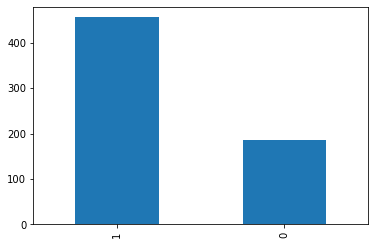

In [106]:
counts = biospecimen_df['STATUS'].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [112]:
# Checking
biospecimen_df[biospecimen_df['PATNO'] == 3001]

,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE,STATUS
353,3001.0,987.28,1412.6,14.858,174.42,278.6,1


In [110]:
biospecimen_df.to_csv(load_path + "biospecimen_masterDB.csv", index = False)

In [111]:
pd.read_csv(load_path + "biospecimen_masterDB.csv").head()

,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE,STATUS
0,3915.0,1119.375,1719.650,13.1200,158.350,237.000000,1
1,3914.0,614.150,1584.650,14.0825,174.325,270.285714,1
2,3838.0,746.900,1256.775,10.9825,137.050,234.571429,1
3,3819.0,612.020,1136.380,8.4880,109.100,231.875000,1
4,3900.0,511.280,1263.540,11.3980,145.260,400.666667,1


In [ ]:
# Checking BIOSPECIMEN and CLINICAL

In [114]:
!ls

Biospecimen_CSVs  creating_master_Biospecimen.ipynb  PPMI_ClinicalData
Clinical_CSVs	  creating_master_Clinical.ipynb     understanding_data.ipynb


In [118]:
biospecimen_df = pd.read_csv(load_path + "biospecimen_masterDB.csv")
clinical_df = pd.read_csv("./Clinical_CSVs/" + "clinical_masterDB.csv")

In [120]:
merged_df = pd.merge(left = biospecimen_df,
         right = clinical_df, 
         left_on = 'PATNO',
         right_on = 'PATNO')
merged_df.head()

,PATNO,ABETA42,A_SYN,P_TAU,T_TAU,URATE,STATUS_x,First_Fam_Num,First_Fam_PD,Other_Fam_Num,...,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL,SFT,STAI,UPSIT,STATUS_y
0,3914.0,614.150,1584.650,14.0825,174.325,270.285714,1,6.0,0.0,6.0,...,0.125000,2.500000,0.125000,1.250000,0.500,0.000000,61.428571,44.375000,27.0,1
1,3838.0,746.900,1256.775,10.9825,137.050,234.571429,1,13.0,0.0,24.0,...,1.666667,2.333333,0.777778,0.111111,0.000,0.444444,50.250000,50.777778,26.5,1
2,3819.0,612.020,1136.380,8.4880,109.100,231.875000,1,5.0,1.0,7.0,...,2.400000,4.600000,0.100000,1.000000,0.400,0.500000,46.000000,63.900000,12.5,1
3,3900.0,511.280,1263.540,11.3980,145.260,400.666667,1,5.0,0.0,9.0,...,2.125000,7.125000,0.125000,1.250000,0.375,2.375000,43.500000,60.625000,24.0,1
4,3911.0,681.975,1293.575,11.0250,141.825,346.857143,1,8.0,0.0,7.0,...,4.500000,4.125000,1.375000,2.125000,0.250,1.500000,44.285714,51.250000,11.0,1


1    385
0     18
Name: STATUS_y, dtype: int64


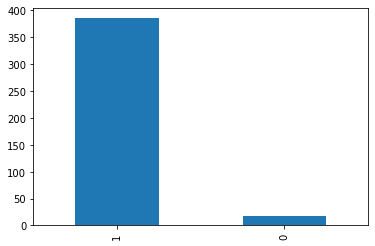

In [122]:
counts = merged_df['STATUS_y'].value_counts()
counts.plot(kind = 'bar')
print(counts)